In [ ]:
! pip install  pandas

In [1]:
import pickle
import pandas as pd

In [2]:
! pip install --upgrade numpy


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.3.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB 330.3 kB/s eta 0:00:39
   ---------------------------------------- 0.0/12.7 MB 326.8 kB/s eta 0:00:39
   ---------------------------------------- 0.1/12.7 MB 416.7 kB/s eta 0:00:31
   ---------------------------------------- 0.1/12.7 MB 403.5 kB/s eta 0:00:32
   ---------------------------------------- 0.1/12.7 MB 425.1 kB/s eta 0:00:30
   ---------------------------------------- 0.1/12.7 MB 426.7 kB/s eta 0:00:30
    --------------------------------------- 0.2/12.7 MB 446.5 kB/s eta 0:00:29
    --------------------------------------- 0.2/12.7 MB 436.9 kB/s eta 0:00:29
    ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.3.0 which is incompatible.
pyarrow 15.0.2 requires numpy<2,>=1.16.6, but you have numpy 2.3.0 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.3.0 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.3.0 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.3.0 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.3.0 which is incompatible.
streamlit 1.32.0 requires packaging<24,>=16.8, but you ha

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import pickle


C:\Users\mosa\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:


# تحميل البيانات من ملف .pickle
with open('data1.pickle', 'rb') as f:
    dataset = pickle.load(f)

data = dataset['data']
labels = dataset['labels']

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)
df['label'] = labels  # إضافة عمود التسميات

# عرض أول 5 صفوف كمثال
print(df.head())

# عرض معلومات عن الشكل
print("\n📊 عدد الصفوف:", df.shape[0])
print("📊 عدد الأعمدة (شاملة العلامة):", df.shape[1])


          0         1         2         3         4         5         6  \
0  0.057821  0.404682  0.188142  0.387905  0.289902  0.263978  0.304202   
1  0.062986  0.406904  0.196851  0.389831  0.302354  0.264615  0.319223   
2  0.355422  0.514944  0.480007  0.393299  0.571739  0.219939  0.546111   
3  0.255134  0.439397  0.390950  0.322269  0.485038  0.183650  0.458335   
4  0.255134  0.439397  0.390950  0.322269  0.485038  0.183650  0.458335   

          7         8         9  ...  75  76  77  78  79  80  81  82  83  \
0  0.130818  0.324820  0.037417  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1  0.125749  0.342009  0.025926  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2  0.082501  0.469922  0.000000  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3  0.052057  0.359231  0.007758  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4  0.052057  0.359231  0.007758  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 85 columns]

📊 

✅ تم حفظ البيانات في dataset.csv


In [ ]:
import pickle
import pandas as pd
import numpy as np

# Load the pickle file
with open('/data1.pickle', 'rb') as f:
    data_dict = pickle.load(f)

# Extract data and labels
raw_data = data_dict['data']
labels = data_dict['labels']

# Create a DataFrame
# Convert each item to a NumPy array and flatten it
data_flattened = [np.array(item).flatten() for item in raw_data]  # Ensure NumPy array before flattening
df = pd.DataFrame(data_flattened)

# Add the labels as a column
df['label'] = labels

# Save to CSV
df.to_csv('data1.csv', index=False)

print("Conversion complete. File 'data1.csv' has been created.")

Conversion complete. File 'data1.csv' has been created.


In [14]:
df = pd.read_csv('data1.csv')

In [15]:
print("\n🧾 بيانات data بعد التنظيف (أول 5 صفوف):")
print(data[:5])

print("\n🏷️ بيانات labels بعد التنظيف (أول 5 قيم):")
print(labels[:5])

# 6. إحصائيات التصنيفات
print("\n📊 توزيع التصنيفات بعد التنظيف:")
print(df['label'].value_counts().sort_index())


🧾 بيانات data بعد التنظيف (أول 5 صفوف):
[[0.05782082676887512, 0.4046819508075714, 0.1881420910358429, 0.387905091047287, 0.28990212082862854, 0.26397785544395447, 0.3042019307613373, 0.1308184564113617, 0.32482048869132996, 0.037417203187942505, 0.222929447889328, 0.12289878726005554, 0.25802651047706604, 0.02606704831123352, 0.2449360191822052, 0.13067325949668884, 0.21363773941993713, 0.21161004900932312, 0.15350160002708435, 0.1096893846988678, 0.19079050421714783, 0.0, 0.1802487075328827, 0.13102015852928162, 0.15294572710990906, 0.21480122208595276, 0.0827089250087738, 0.1095183789730072, 0.11801376938819885, 0.004350125789642334, 0.11650922894477844, 0.14024165272712708, 0.09608760476112366, 0.22405019402503967, 0.0, 0.12085852026939392, 0.046986937522888184, 0.035849422216415405, 0.05596157908439636, 0.13354340195655823, 0.04329797625541687, 0.20394465327262878], [0.06298601627349854, 0.40690410137176514, 0.19685065746307373, 0.38983118534088135, 0.3023543357849121, 0.26461452

In [16]:
df['label'].unique()

array([ 0,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29,  3, 30, 31, 32,  4,  5,  6,  7,  8,  9],
      dtype=int64)

In [17]:
# Summary Statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
                  0            1            2            3            4  \
count  6564.000000  6564.000000  6564.000000  6564.000000  6564.000000   
mean      0.220847     0.478317     0.277954     0.413826     0.295328   
std       0.173353     0.225073     0.162363     0.208422     0.150802   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.103490     0.328031     0.168183     0.262230     0.183547   
50%       0.174142     0.479153     0.256092     0.421145     0.291224   
75%       0.288068     0.653672     0.368912     0.575404     0.387276   
max       0.857793     0.905950     0.868465     0.838656     0.852425   

                 5            6            7            8            9  ...  \
count  6564.000000  6564.000000  6564.000000  6564.000000  6564.000000  ...   
mean      0.310562     0.261571     0.240778     0.219775     0.207393  ...   
std       0.171800     0.143324     0.147683     0.159479     0.149345  ..

In [18]:
# Label Distribution
print("\nLabel Distribution:\n", df['label'].value_counts())



Label Distribution:
 label
25    317
11    282
10    268
1     266
3     264
13    258
21    254
5     252
7     245
22    244
15    240
12    239
8     239
17    237
6     233
20    233
24    231
0     216
9     211
2     192
14    187
23    185
4     170
19    168
16    153
18    147
26    100
28    100
29    100
27     96
30     82
31     81
32     74
Name: count, dtype: int64


In [19]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,label
count,6564.000000,6564.000000,6564.000000,6564.000000,6564.000000,6564.000000,6564.000000,6564.000000,6564.000000,6564.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,6564.000000
mean,0.220847,0.478317,0.277954,0.413826,0.295328,0.310562,0.261571,0.240778,0.219775,0.207393,...,0.259053,0.141114,0.280444,0.124229,0.251157,0.126854,0.257115,0.129523,0.259476,14.040219
std,0.173353,0.225073,0.162363,0.208422,0.150802,0.171800,0.143324,0.147683,0.159479,0.149345,...,0.209786,0.140115,0.157110,0.128579,0.165462,0.129536,0.189759,0.133298,0.209774,8.699088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.036258,0.001933,0.009218,0.000000,0.001363,0.000000
25%,0.103490,0.328031,0.168183,0.262230,0.183547,0.173512,0.153161,0.111797,0.093588,0.076634,...,0.031095,0.006483,0.146123,0.024344,0.104050,0.037720,0.079057,0.036229,0.060599,7.000000
50%,0.174142,0.479153,0.256092,0.421145,0.291224,0.306881,0.246367,0.233230,0.192576,0.200611,...,0.263958,0.108202,0.258921,0.067666,0.244695,0.055971,0.251352,0.064441,0.260054,13.000000
75%,0.288068,0.653672,0.368912,0.575404,0.387276,0.446053,0.356512,0.361426,0.303127,0.321267,...,0.472842,0.294484,0.383270,0.274365,0.395468,0.276202,0.437247,0.250444,0.472096,21.000000
max,0.857793,0.905950,0.868465,0.838656,0.852425,0.739953,0.823732,0.660830,0.906892,0.702688,...,0.590582,0.384249,0.591372,0.379926,0.580234,0.417519,0.584335,0.489610,0.591295,32.000000


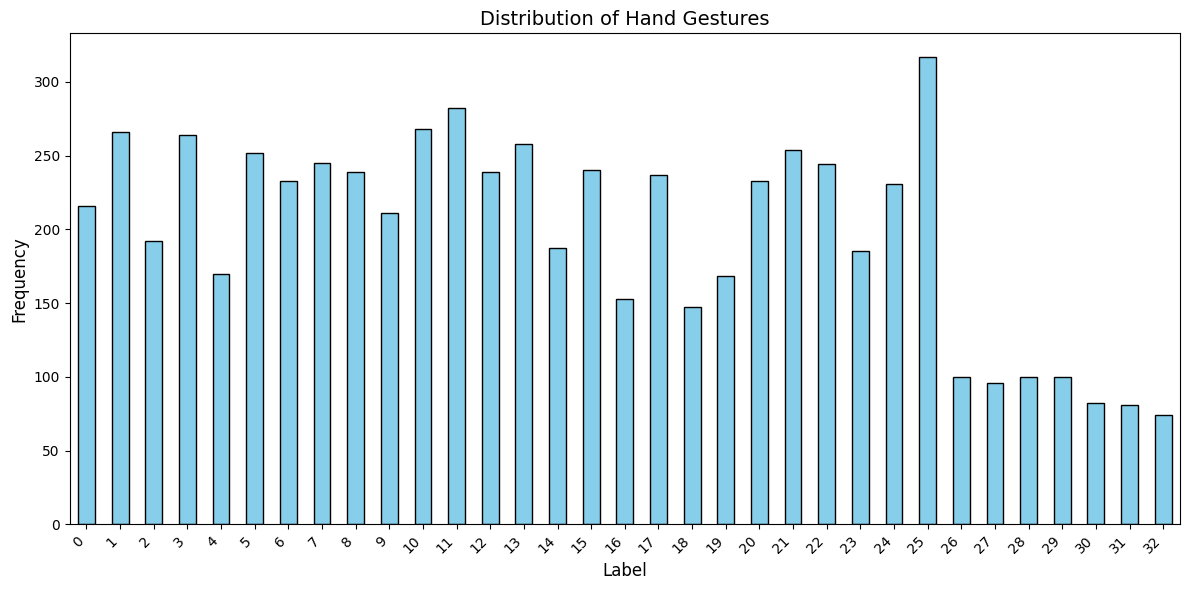

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
df = pd.read_csv('data1.csv')

# Plot the distribution of numerical labels
plt.figure(figsize=(12, 6))
df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Hand Gestures', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [2]:
df = pd.read_csv('data1.csv')

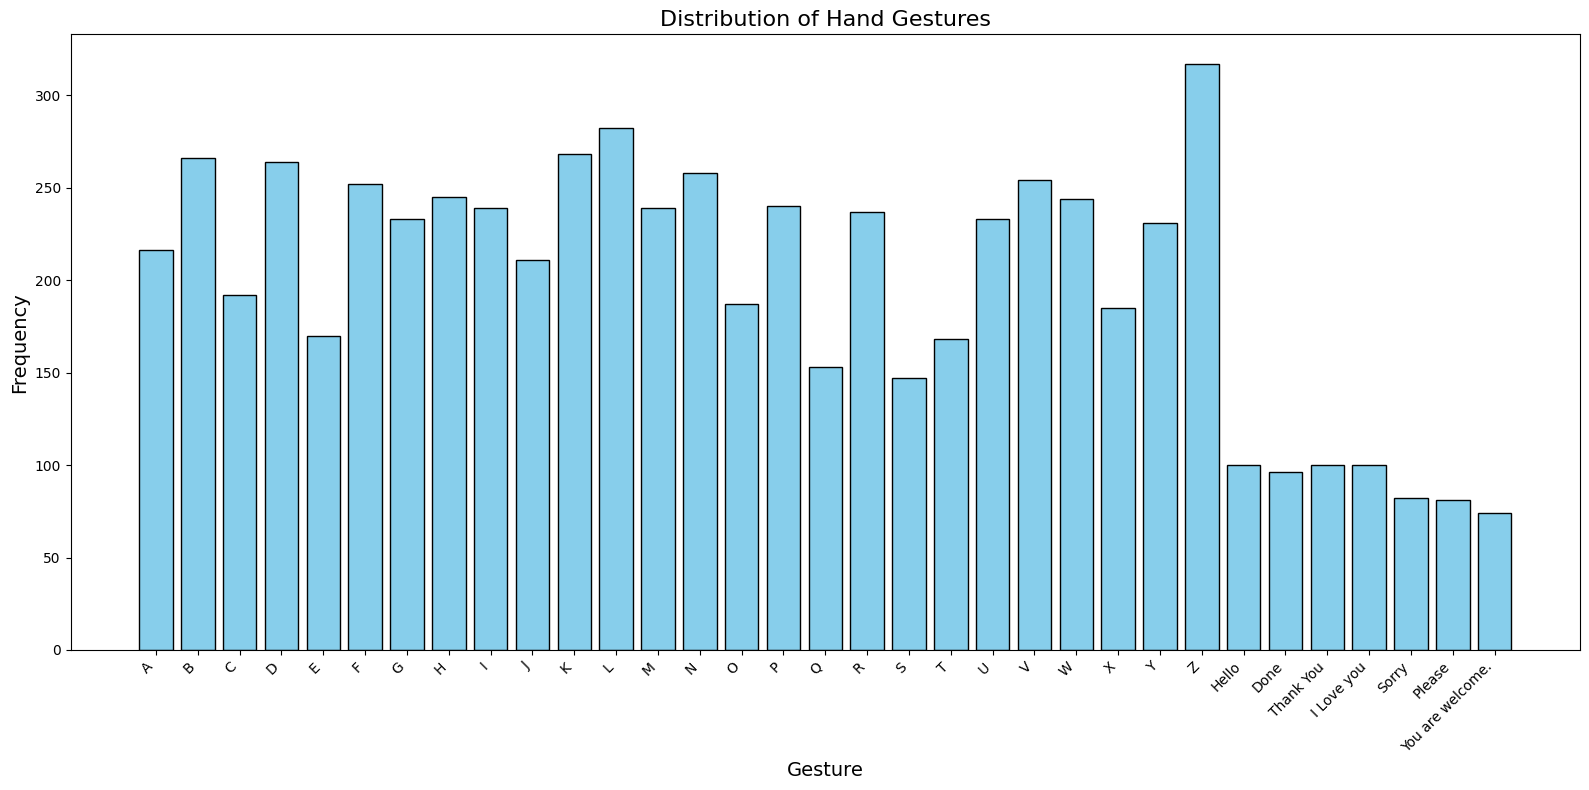

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
df = pd.read_csv('data1.csv')

# Dictionary to map numeric labels to actual gesture names
labels_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'Hello',
    27: 'Done', 28: 'Thank You', 29: 'I Love you', 30: 'Sorry', 31: 'Please',
    32: 'You are welcome.'
}

# Count frequency of each label and map to gesture names
label_counts = df['label'].value_counts().sort_index()
label_names = [labels_dict[i] for i in label_counts.index]

# Plot
plt.figure(figsize=(16, 8))
plt.bar(label_names, label_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Hand Gestures', fontsize=16)
plt.xlabel('Gesture', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


📊 Number of columns in the file: 85
✅ Renamed columns:
['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24', 'x25', 'y25', 'x26', 'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29', 'x30', 'y30', 'x31', 'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34', 'x35', 'y35', 'x36', 'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39', 'x40', 'y40', 'x41', 'y41', 'label']
✅ All labels are defined in the dictionary.


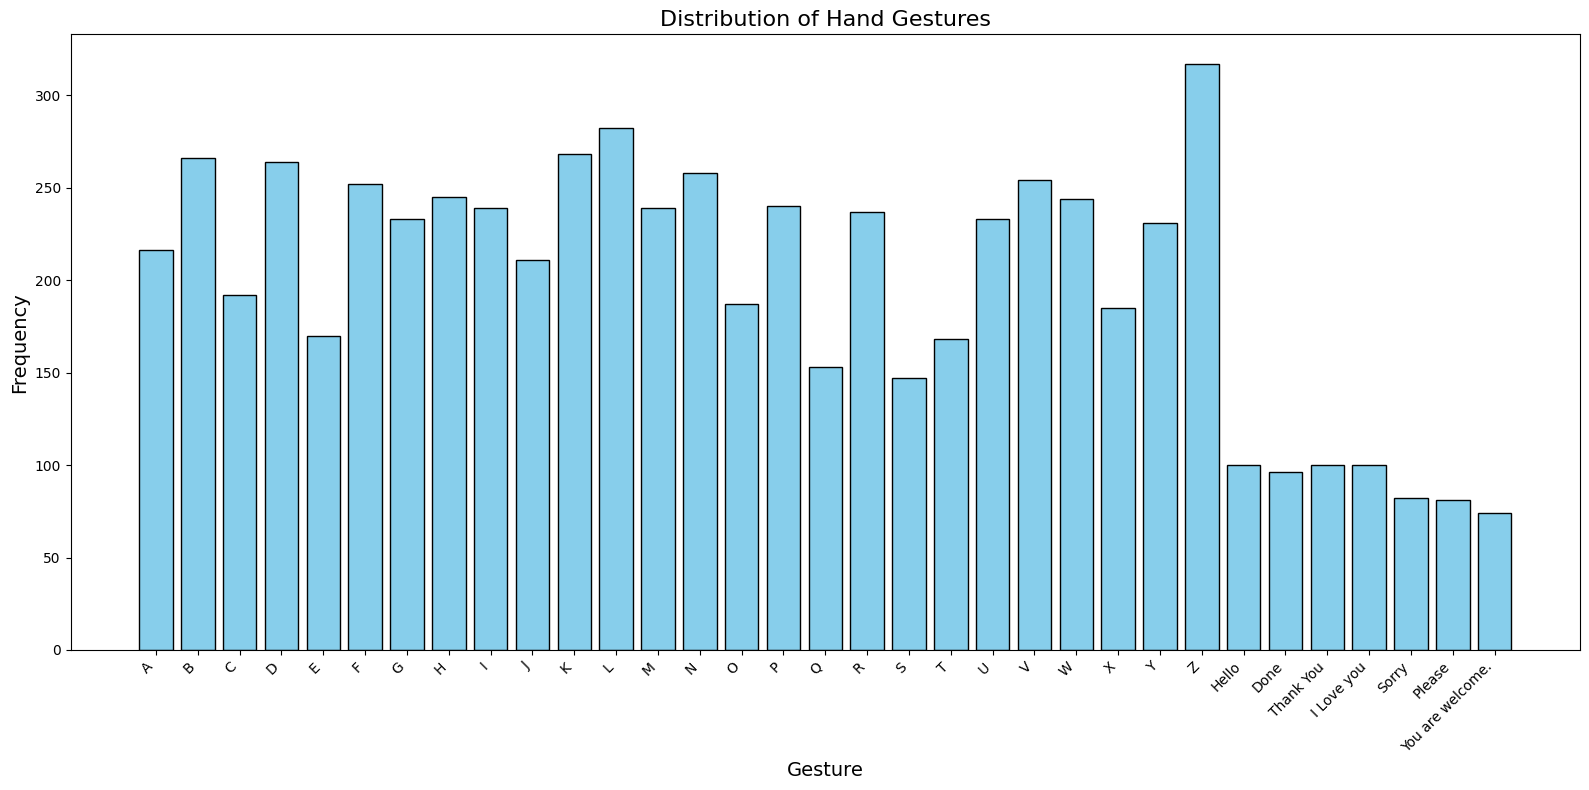

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV
df = pd.read_csv('data1.csv')

# ✅ Check the total number of columns
num_columns = df.shape[1]
print(f"📊 Number of columns in the file: {num_columns}")

# ✅ Ensure the number of columns (excluding label) is even for x/y pairs
if (num_columns - 1) % 2 != 0:
    raise ValueError("❌ Number of columns before label is not even, cannot create x/y correctly.")

# ✅ Rename columns: x0, y0, x1, y1, ...
num_points = (num_columns - 1) // 2
numeric_cols = [f'x{i//2}' if i % 2 == 0 else f'y{i//2}' for i in range(num_points * 2)]
new_columns = numeric_cols + ['label']
df.columns = new_columns

print("✅ Renamed columns:")
print(df.columns.tolist())

# ✅ Dictionary for label mapping
labels_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'Hello',
    27: 'Done', 28: 'Thank You', 29: 'I Love you', 30: 'Sorry', 31: 'Please',
    32: 'You are welcome.'
}

# ✅ Check for undefined labels
unique_labels = df['label'].unique()
unknown = set(unique_labels) - set(labels_dict.keys())
if unknown:
    print(f"⚠️ Undefined labels in dictionary: {unknown}")
else:
    print("✅ All labels are defined in the dictionary.")

# ✅ Plotting
label_counts = df['label'].value_counts().sort_index()
label_names = [labels_dict[i] for i in label_counts.index]

plt.figure(figsize=(16, 8))
plt.bar(label_names, label_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Hand Gestures', fontsize=16)
plt.xlabel('Gesture', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Number of columns in DataFrame: 85
✅ Renamed columns:
['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24', 'x25', 'y25', 'x26', 'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29', 'x30', 'y30', 'x31', 'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34', 'x35', 'y35', 'x36', 'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39', 'x40', 'y40', 'x41', 'y41', 'label']
✅ All labels are defined in the dictionary.


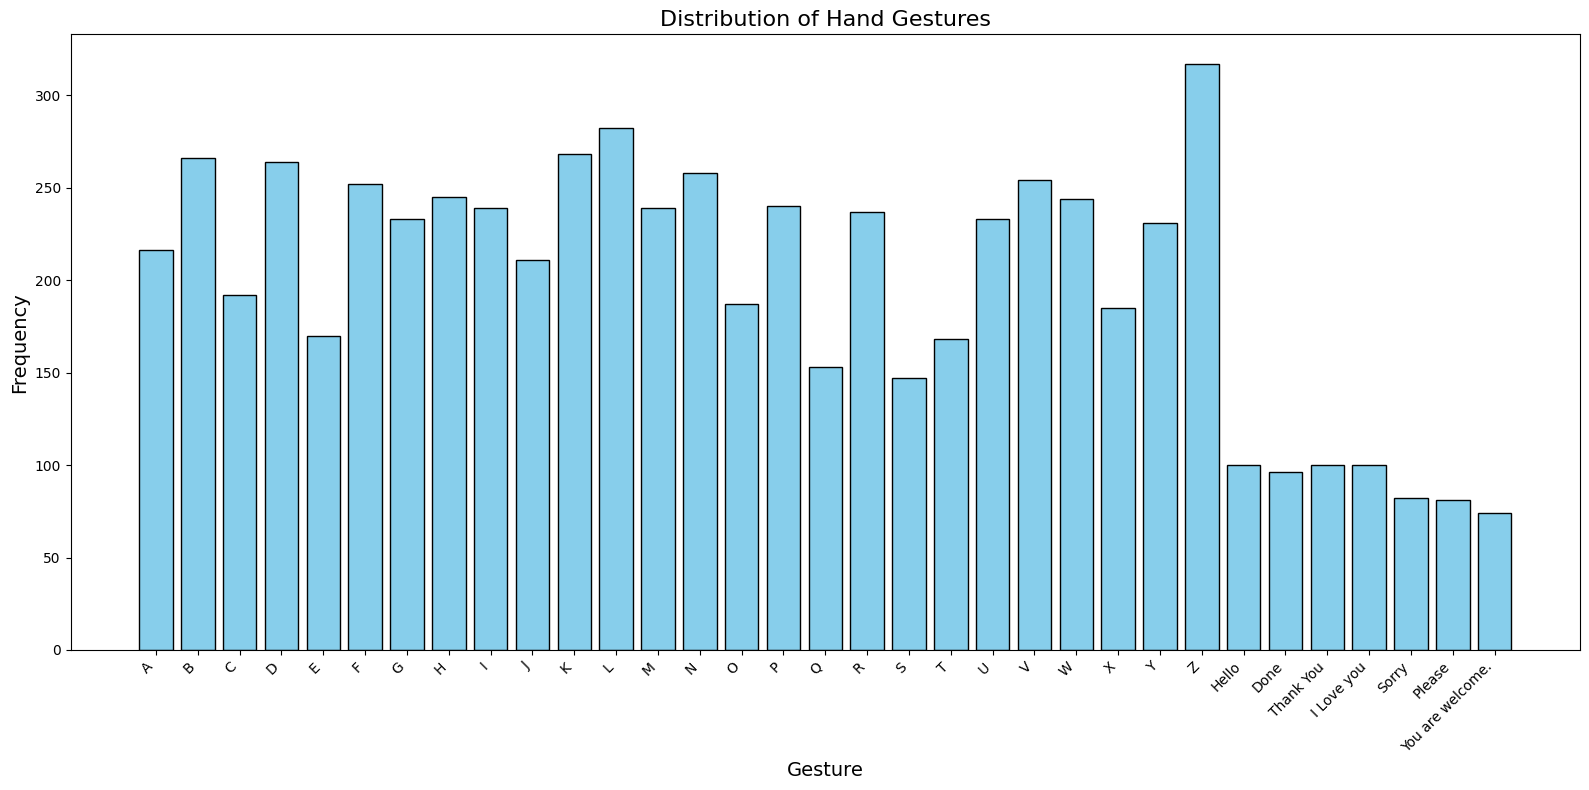

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv('data1.csv')

# Verify the number of columns
print(f"Number of columns in DataFrame: {len(df.columns)}")

# Rename columns: x0, y0, x1, y1, ..., x41, y41, label (assuming 42 points × 2 + 1 = 85 columns)
numeric_cols = [f'x{i//2}' if i % 2 == 0 else f'y{i//2}' for i in range(84)]  # 42 points × 2 = 84 columns
new_columns = numeric_cols + ['label']  # Total = 85 columns
df.columns = new_columns

print("✅ Renamed columns:")
print(df.columns.tolist())

# Dictionary for mapping numeric labels to gesture names
labels_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'Hello',
    27: 'Done', 28: 'Thank You', 29: 'I Love you', 30: 'Sorry', 31: 'Please',
    32: 'You are welcome.'
}

# Check for undefined labels
unique_labels = df['label'].unique()
unknown = set(unique_labels) - set(labels_dict.keys())
if unknown:
    print(f"⚠️ Undefined labels in dictionary: {unknown}")
else:
    print("✅ All labels are defined in the dictionary.")

# Plotting
label_counts = df['label'].value_counts().sort_index()
label_names = [labels_dict[i] for i in label_counts.index]

plt.figure(figsize=(16, 8))
plt.bar(label_names, label_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Hand Gestures', fontsize=16)
plt.xlabel('Gesture', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Analyze the dataset to gain insights into the hand landmark data.

In [126]:
print("🔍 أعمدة DataFrame:")
print(df.columns.tolist())


🔍 أعمدة DataFrame:
['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'label']


In [127]:
# إعادة تسمية الأعمدة: 0, 1, 2, ... إلى x0, y0, x1, y1, ...
numeric_cols = [f'x{i//2}' if i % 2 == 0 else f'y{i//2}' for i in range(42)]  # 0 إلى 41
new_columns = numeric_cols + ['label']  # أضف العمود الأخير كما هو
df.columns = new_columns

print("✅ أسماء الأعمدة بعد التعديل:")
print(df.columns.tolist())


✅ أسماء الأعمدة بعد التعديل:
['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'label']


                x0           y0           x1           y1           x2  \
count  6564.000000  6564.000000  6564.000000  6564.000000  6564.000000   
mean      0.220847     0.478317     0.277954     0.413826     0.295328   
std       0.173353     0.225073     0.162363     0.208422     0.150802   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.103490     0.328031     0.168183     0.262230     0.183547   
50%       0.174142     0.479153     0.256092     0.421145     0.291224   
75%       0.288068     0.653672     0.368912     0.575404     0.387276   
max       0.857793     0.905950     0.868465     0.838656     0.852425   

                y2           x3           y3           x4           y4  ...  \
count  6564.000000  6564.000000  6564.000000  6564.000000  6564.000000  ...   
mean      0.310562     0.261571     0.240778     0.219775     0.207393  ...   
std       0.171800     0.143324     0.147683     0.159479     0.149345  ...   
min       0.00000

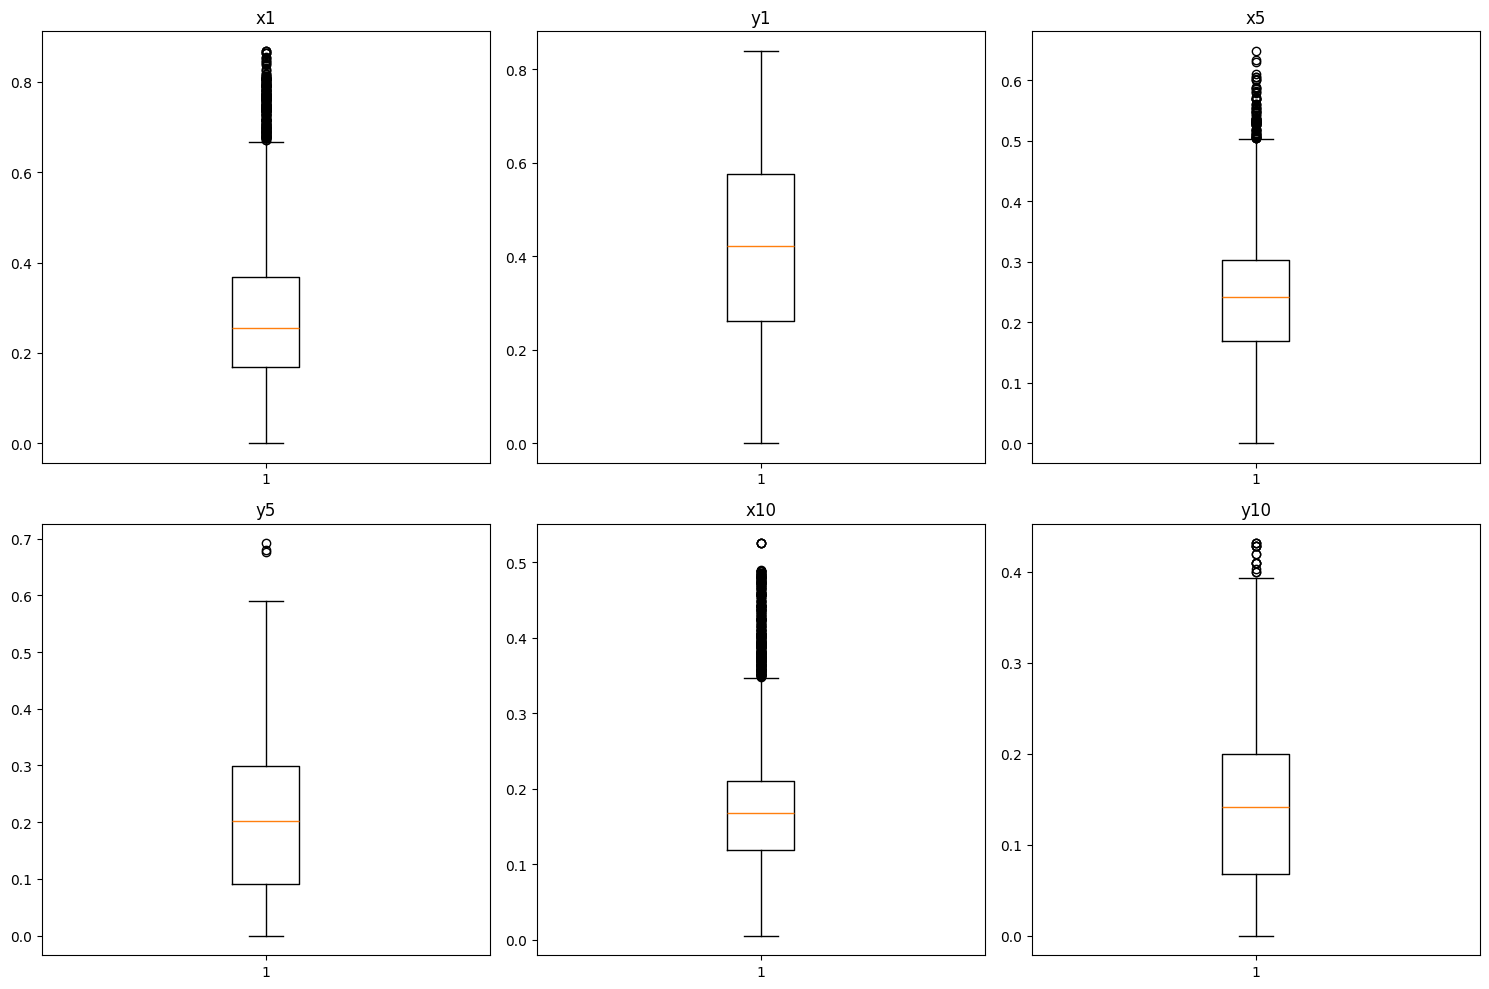

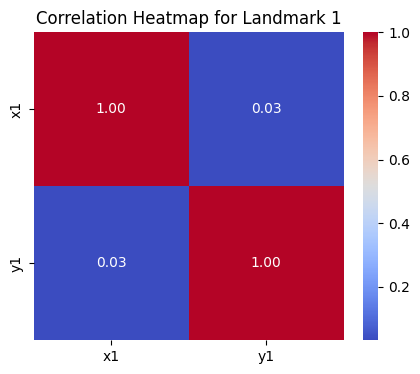

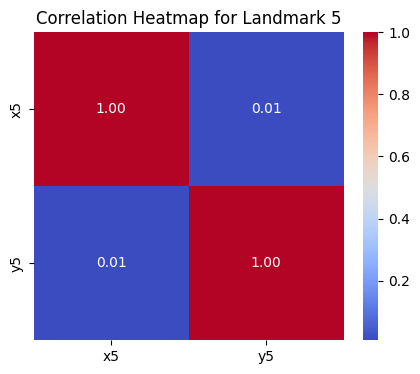

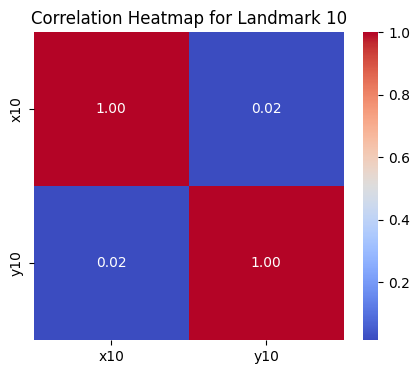

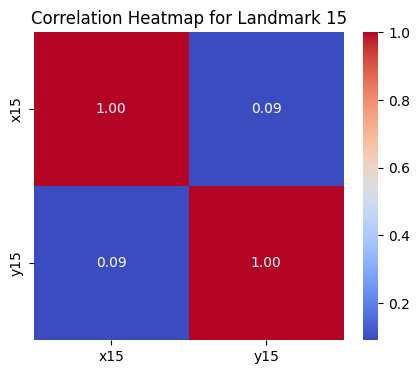

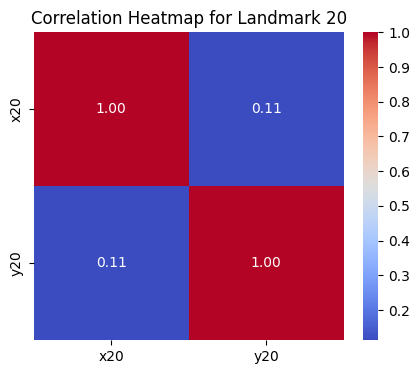

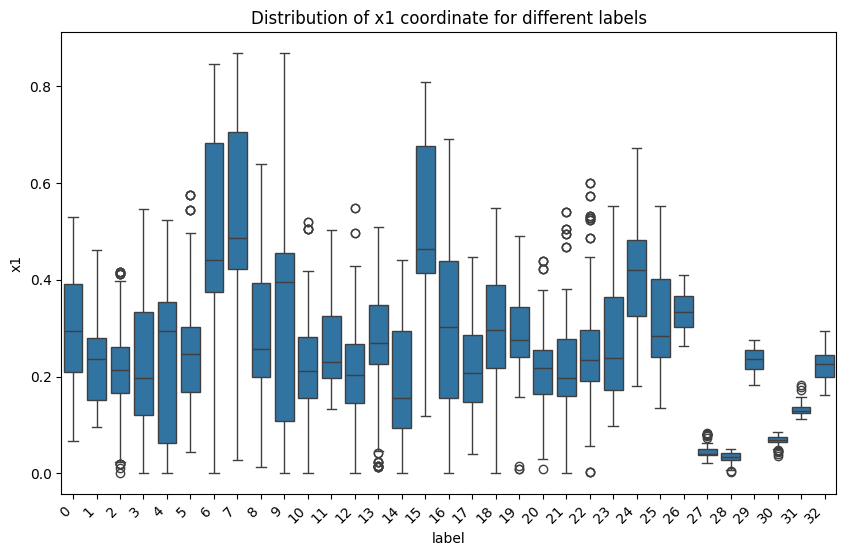

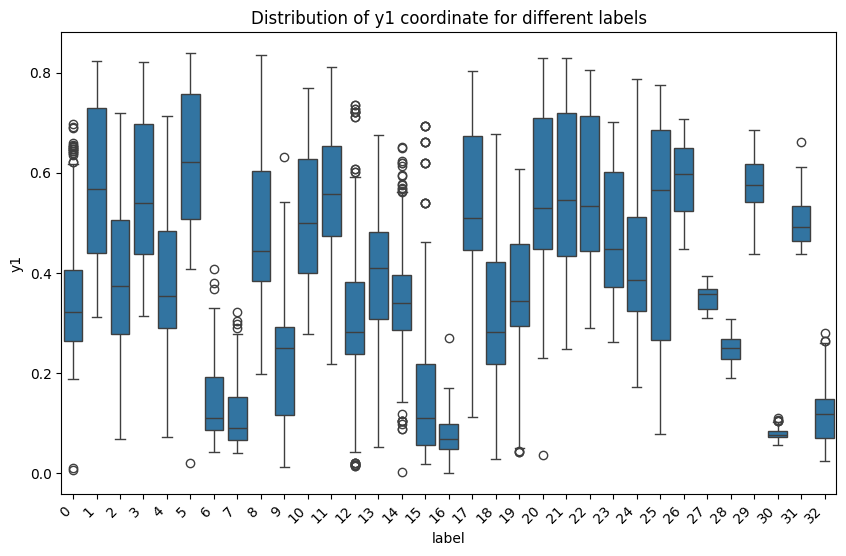

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# وصف إحصائي
print(df.describe())

# Box plots لبعض النقاط (x1, y1, x5, y5, ...)
plt.figure(figsize=(15, 10))
for i, col in enumerate(['x1', 'y1', 'x5', 'y5', 'x10', 'y10']):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# المصفوفة الارتباطية heatmap
landmarks = [1, 5, 10, 15, 20]
for i in landmarks:
    corr = df[[f'x{i}', f'y{i}']].corr()
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for Landmark {i}")
    plt.show()

# العلاقة بين الإحداثيات والتسمية (label)
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='x1', data=df)
plt.title('Distribution of x1 coordinate for different labels')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='y1', data=df)
plt.title('Distribution of y1 coordinate for different labels')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
print(df.columns)


Index(['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5',
       'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11',
       'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16',
       'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21',
       'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24', 'x25', 'y25', 'x26',
       'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29', 'x30', 'y30', 'x31',
       'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34', 'x35', 'y35', 'x36',
       'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39', 'x40', 'y40', 'x41',
       'y41', 'label'],
      dtype='object')


In [16]:
df['label'].value_counts()

label
25    317
11    282
10    268
1     266
3     264
13    258
21    254
5     252
7     245
22    244
15    240
12    239
8     239
17    237
6     233
20    233
24    231
0     216
9     211
2     192
14    187
23    185
4     170
19    168
16    153
18    147
26    100
28    100
29    100
27     96
30     82
31     81
32     74
Name: count, dtype: int64

C:\Users\mosa\AppData\Local\Temp\ipykernel_7512\3595195236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")


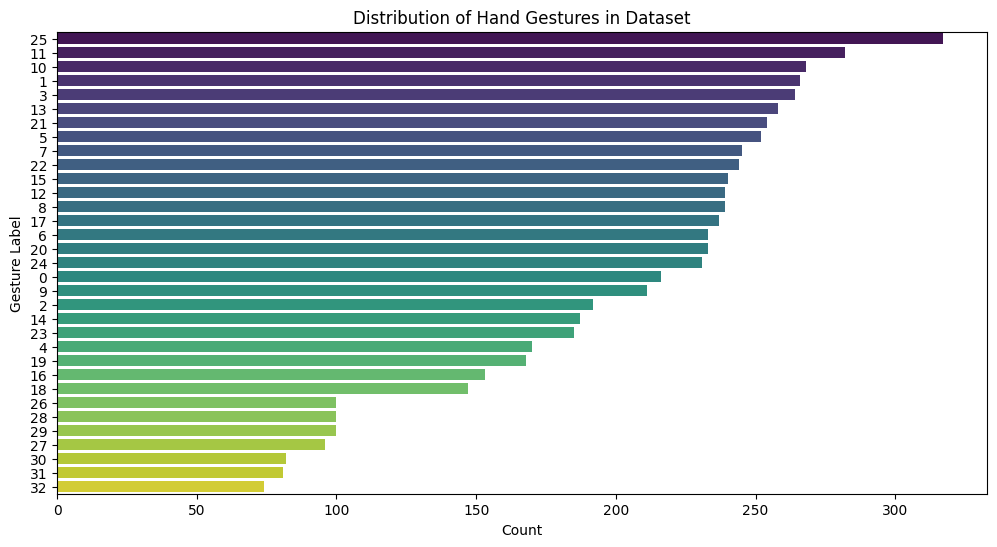

In [17]:
# Visualizing the count of each class
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Gesture Label")
plt.title("Distribution of Hand Gestures in Dataset")
plt.show()

In [18]:
df['label'].unique()

array([ 0,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29,  3, 30, 31, 32,  4,  5,  6,  7,  8,  9],
      dtype=int64)

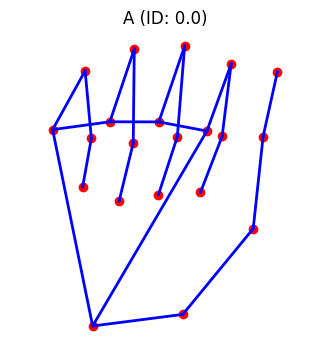

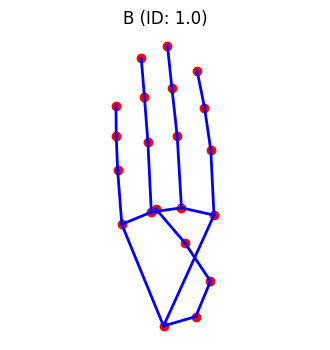

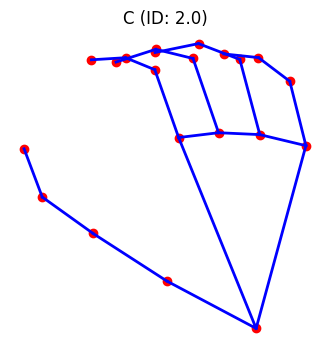

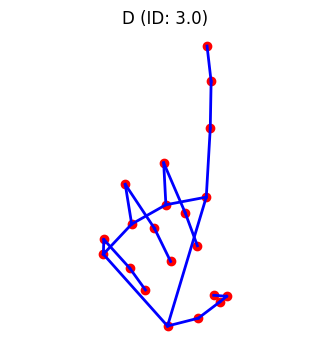

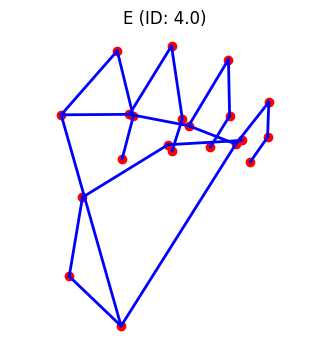

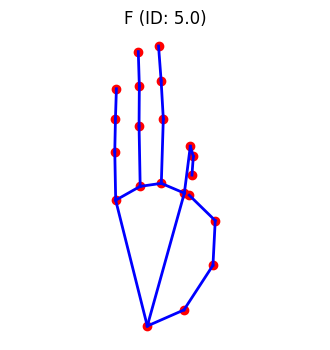

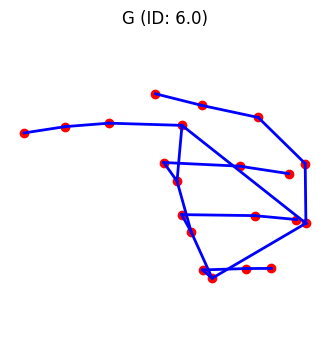

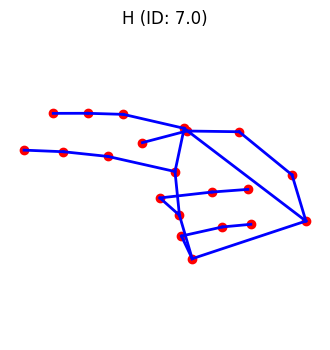

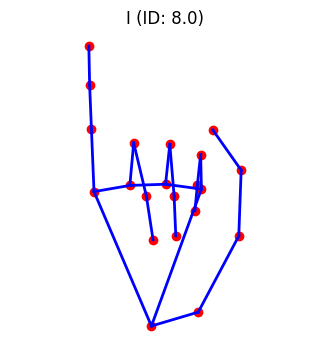

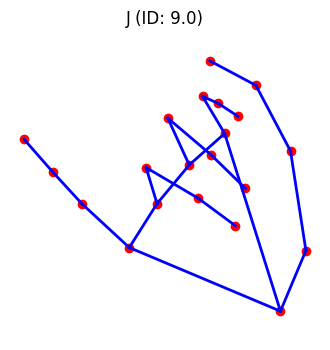

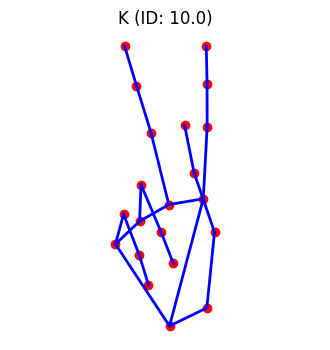

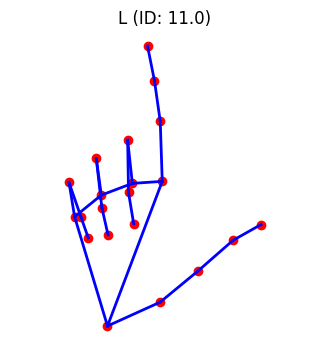

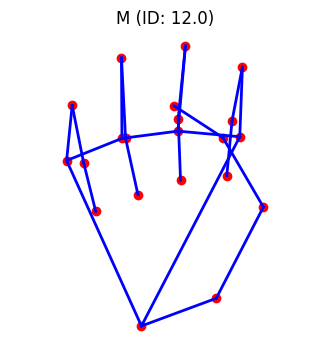

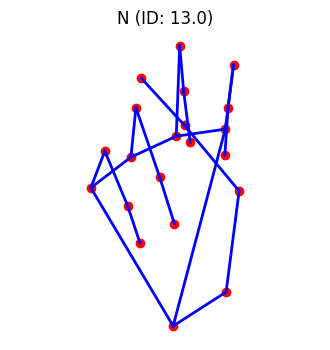

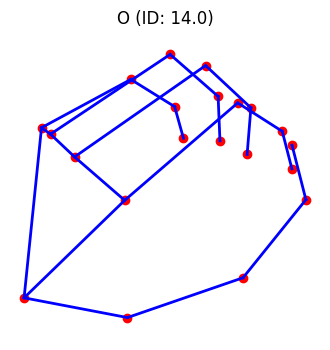

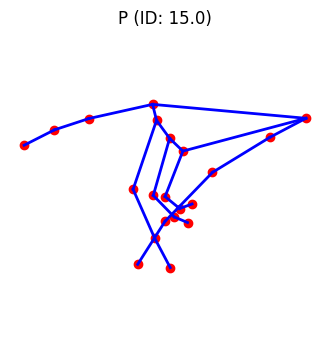

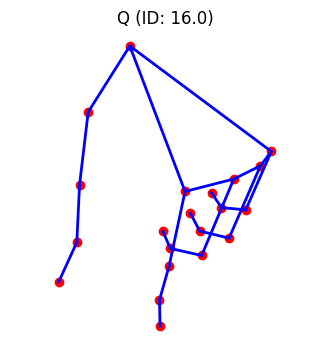

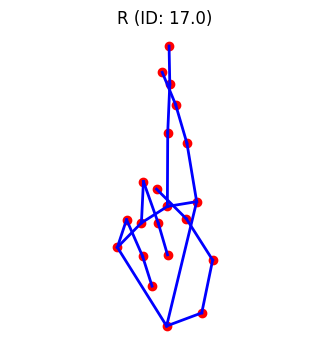

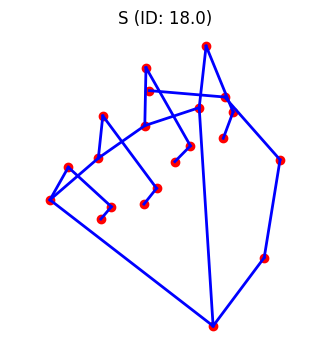

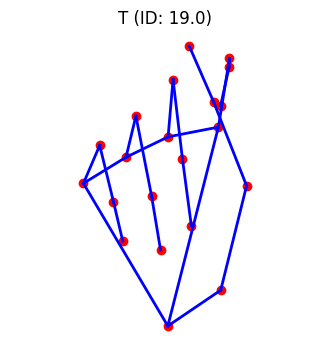

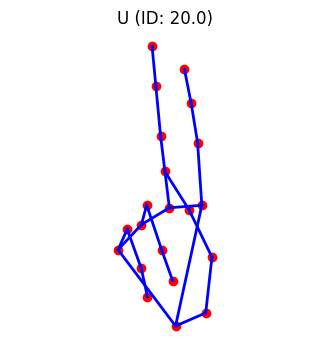

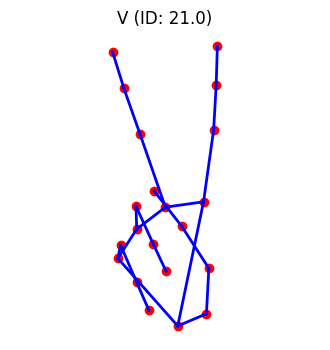

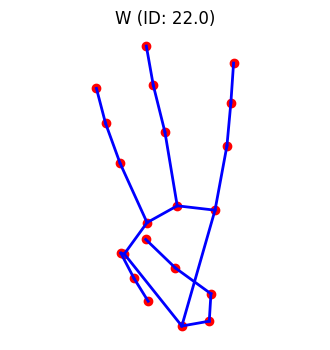

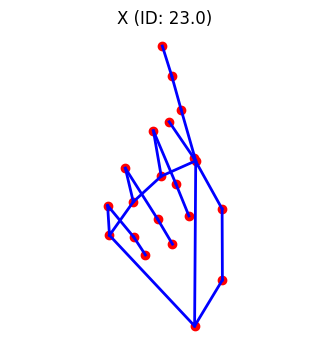

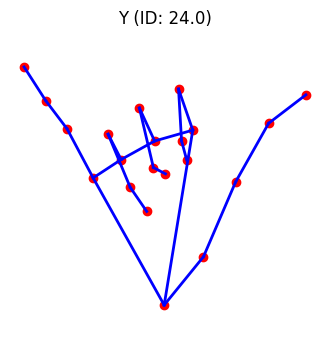

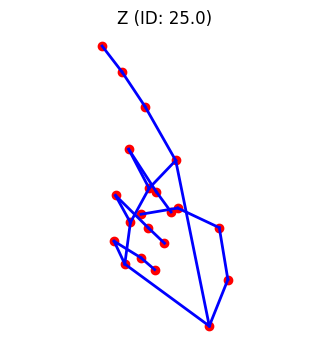

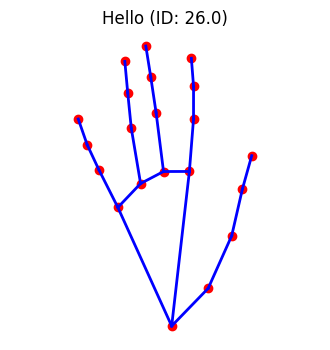

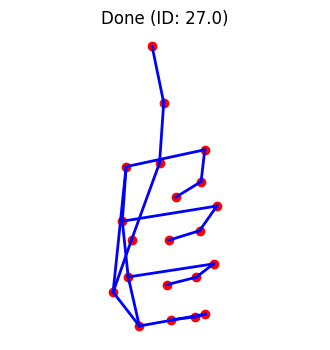

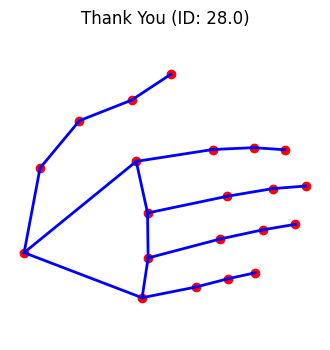

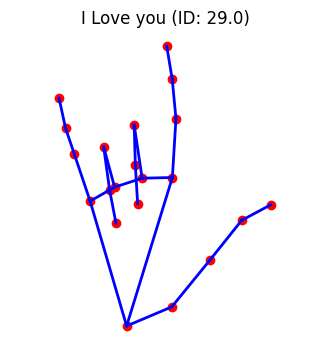

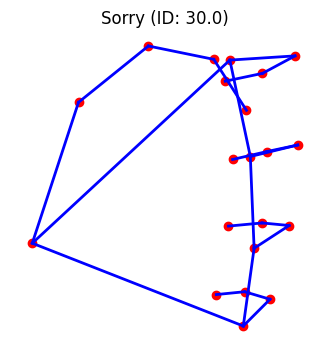

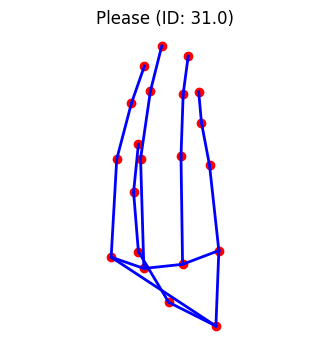

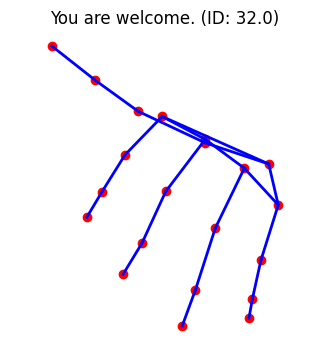

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# تحميل البيانات

# القاموس المعدل لتفسير أرقام الـ labels
labels_dict = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
        19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'Hello',
        27: 'Done', 28: 'Thank You', 29: 'I Love you', 30: 'Sorry', 31: 'Please',
        32: 'You are welcome.'
    }

# دالة لعرض الإشارة اليدوية
def plot_hand_gesture(df, sample_index):
    sample = df.iloc[sample_index]
    x_coords = [sample[f'x{i}'] for i in range(21)]
    y_coords = [sample[f'y{i}'] for i in range(21)]
    y_coords = np.max(y_coords) - np.array(y_coords)  # عكس اتجاه Y لعرض طبيعي

    # توصيل النقاط
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),        # إبهام
        (0, 5), (5, 6), (6, 7), (7, 8),        # سبابة
        (5, 9), (9, 10), (10, 11), (11, 12),   # وسطى
        (9, 13), (13, 14), (14, 15), (15, 16), # بنصر
        (0, 17), (13, 17), (17, 18), (18, 19), (19, 20)  # خنصر
    ]

    plt.figure(figsize=(4, 4))
    plt.scatter(x_coords, y_coords, color='red', label='Keypoints')
    for connection in connections:
        x1, y1 = x_coords[connection[0]], y_coords[connection[0]]
        x2, y2 = x_coords[connection[1]], y_coords[connection[1]]
        plt.plot([x1, x2], [y1, y2], 'blue', linewidth=2)

    gesture_id = sample['label']
    gesture_name = labels_dict.get(gesture_id, f"Unknown ({gesture_id})")
    plt.title(f"{gesture_name} (ID: {gesture_id})")
    plt.axis("equal")
    plt.axis("off")
    plt.show()

# عرض أول مثال من كل إشارة
for gesture_id in sorted(df['label'].unique()):
    df_subset = df[df['label'] == gesture_id]
    if not df_subset.empty:
        plot_hand_gesture(df_subset, 0)


In [20]:
print(df['label'].unique())


[ 0  1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3
 30 31 32  4  5  6  7  8  9]


In [23]:
print(df['label'].value_counts().sort_index())


label
0     216
1     266
2     192
3     264
4     170
5     252
6     233
7     245
8     239
9     211
10    268
11    282
12    239
13    258
14    187
15    240
16    153
17    237
18    147
19    168
20    233
21    254
22    244
23    185
24    231
25    317
26    100
27     96
28    100
29    100
30     82
31     81
32     74
Name: count, dtype: int64


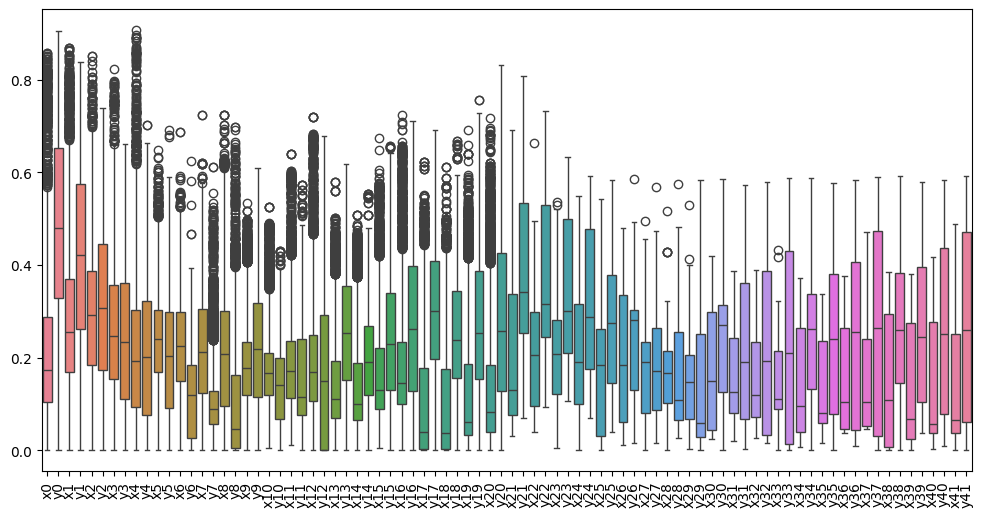

In [24]:
# Check the Distribution of Data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.show()

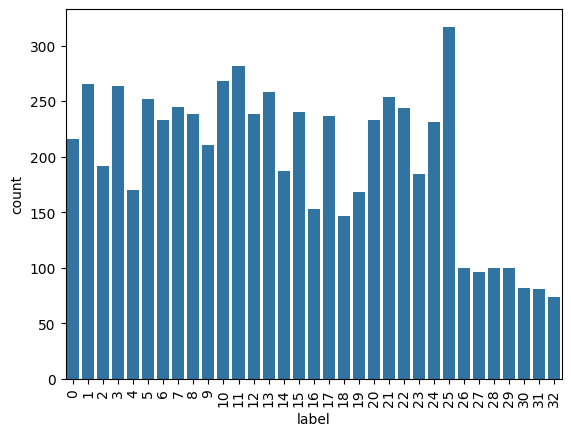

In [25]:
# Checking if the data is balanced or not
sns.countplot(x=df['label'])
plt.xticks(rotation=90)
plt.show()


In [140]:
# إعادة تسمية الأعمدة: 0, 1, 2, ... إلى x0, y0, x1, y1, ...
numeric_cols = [f'x{i//2}' if i % 2 == 0 else f'y{i//2}' for i in range(42)]  # 0 إلى 41
new_columns = numeric_cols + ['label']  # أضف العمود الأخير كما هو
df.columns = new_columns

print("✅ أسماء الأعمدة بعد التعديل:")
print(df.columns.tolist())


✅ أسماء الأعمدة بعد التعديل:
['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'label']


In [26]:
# تعريف خريطة التحويل من الأرقام إلى الحروف/الكلمات
labels_dict = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
        19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'Hello',
        27: 'Done', 28: 'Thank You', 29: 'I Love you', 30: 'Sorry', 31: 'Please',
        32: 'You are welcome.'
    }

# إنشاء عمود جديد باستخدام الخريطة
df['label_char'] = df['label'].map(labels_dict)

# عرض توزيع القيم بعد التحويل
print("✅ توزيع قيم عمود label بعد التحويل إلى حروف/كلمات:")
print(df['label_char'].value_counts())

✅ توزيع قيم عمود label بعد التحويل إلى حروف/كلمات:
label_char
Z                   317
L                   282
K                   268
B                   266
D                   264
N                   258
V                   254
F                   252
H                   245
W                   244
P                   240
M                   239
I                   239
R                   237
G                   233
U                   233
Y                   231
A                   216
J                   211
C                   192
O                   187
X                   185
E                   170
T                   168
Q                   153
S                   147
Hello               100
Thank You           100
I Love you          100
Done                 96
Sorry                82
Please               81
You are welcome.     74
Name: count, dtype: int64


C:\Users\mosa\AppData\Local\Temp\ipykernel_7512\4119392895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label_char'], order=df['label_char'].value_counts().index, palette="viridis")


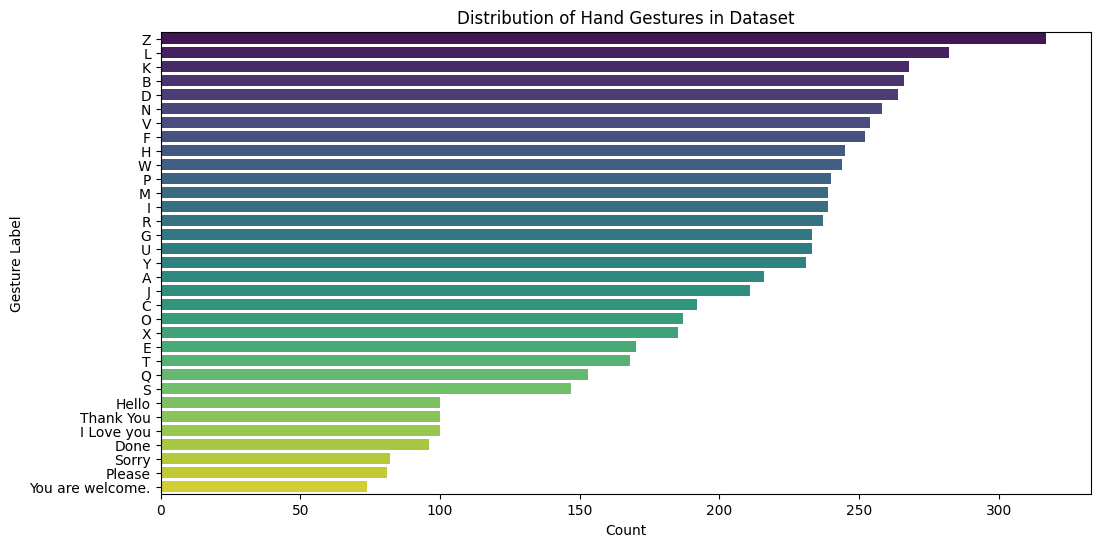

In [27]:
# Visualizing the count of each class
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label_char'], order=df['label_char'].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Gesture Label")
plt.title("Distribution of Hand Gestures in Dataset")
plt.show()

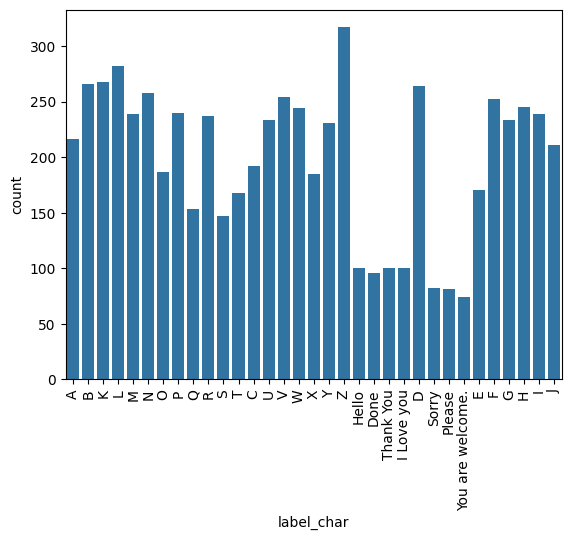

In [28]:
# Checking if the data is balanced or not
sns.countplot(x=df['label_char'])
plt.xticks(rotation=90)
plt.show()

In [144]:
import pandas as pd
import pickle

# قراءة الملف .csv
csv_file = 'clean_data.csv'  # استبدل باسم ملفك الفعلي
df = pd.read_csv(csv_file)

# حفظ الملف كـ .pickle
pickle_file = 'clean_data.pkl'  # اسم الملف الجديد
with open(pickle_file, 'wb') as file:
    pickle.dump(df, file)

print(f"تم تحويل {csv_file} إلى {pickle_file} بنجاح!")

تم تحويل clean_data.csv إلى clean_data.pkl بنجاح!


📊 Number of columns in the file: 85
✅ Renamed columns:
['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24', 'x25', 'y25', 'x26', 'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29', 'x30', 'y30', 'x31', 'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34', 'x35', 'y35', 'x36', 'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39', 'x40', 'y40', 'x41', 'y41', 'label']
📊 Label column dtype: int64
📊 First 5 labels: [0, 0, 0, 0, 0]
✅ All labels are defined in the dictionary.
📊 Selected 42 features to match model expectations
📈 Training Accuracy: 1.0000
📈 Precision: 0.9894
📈 Recall: 0.9893
📈 F1 Score: 0.9893
📊 y_pred dtype: <U2
📊 First 5 predictions: ['13', '14', '25', '7', '13']


C:\Users\mosa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\mosa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\mosa\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier 

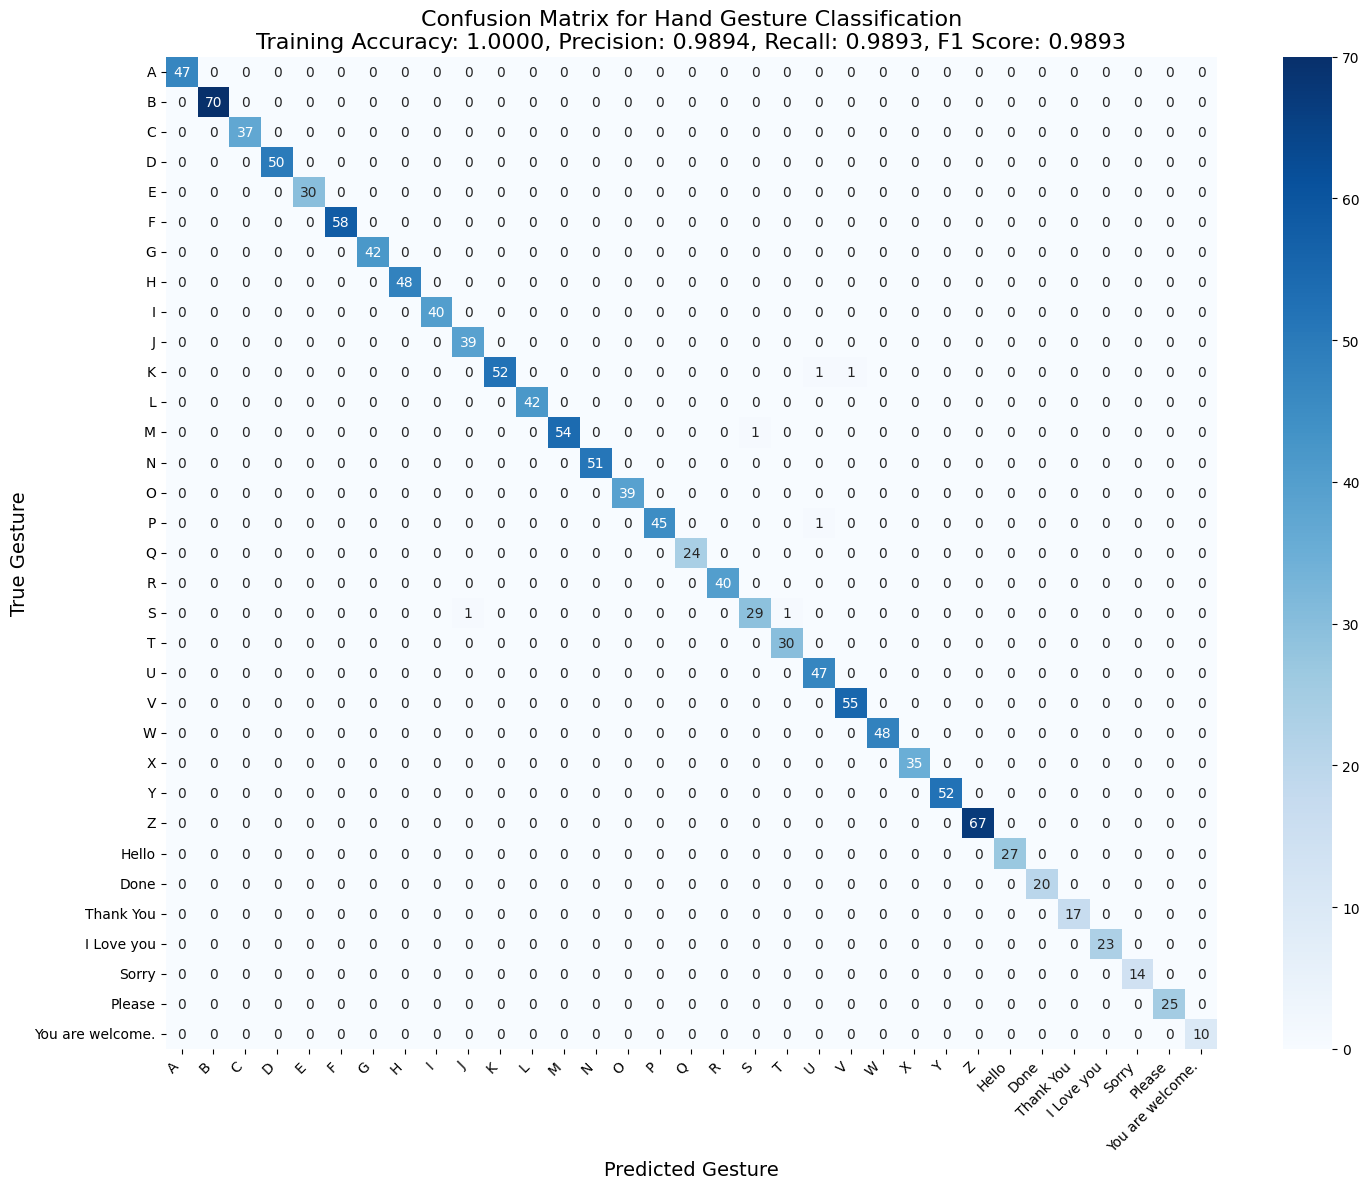

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle

# Load the CSV
df = pd.read_csv('data1.csv')

# ✅ Check the total number of columns
num_columns = df.shape[1]
print(f"📊 Number of columns in the file: {num_columns}")

# ✅ Ensure the number of columns (excluding label) is even for x/y pairs
if (num_columns - 1) % 2 != 0:
    raise ValueError("❌ Number of columns before label is not even, cannot create x/y correctly.")

# ✅ Rename columns: x0, y0, x1, y1, ...
num_points = (num_columns - 1) // 2
numeric_cols = [f'x{i//2}' if i % 2 == 0 else f'y{i//2}' for i in range(num_points * 2)]
new_columns = numeric_cols + ['label']
df.columns = new_columns

print("✅ Renamed columns:")
print(df.columns.tolist())

# ✅ Dictionary for label mapping
labels_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'Hello',
    27: 'Done', 28: 'Thank You', 29: 'I Love you', 30: 'Sorry', 31: 'Please',
    32: 'You are welcome.'
}

# ✅ Reverse dictionary for mapping strings to integers
reverse_labels_dict = {v.strip().lower(): k for k, v in labels_dict.items()}

# ✅ Inspect and convert labels to numeric
print(f"📊 Label column dtype: {df['label'].dtype}")
print(f"📊 First 5 labels: {df['label'].head().tolist()}")

if df['label'].dtype == object or df['label'].dtype == str:
    print("⚠️ Detected string labels in 'label' column. Converting to numeric.")
    # Normalize strings (strip spaces, convert to lowercase)
    df['label'] = df['label'].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)
    df['label'] = df['label'].map(reverse_labels_dict)
    if df['label'].isnull().any():
        unmapped = df[df['label'].isnull()]['label'].unique()
        raise ValueError(f"❌ Unmapped labels in 'data1.csv': {unmapped}")

# Ensure labels are integers
df['label'] = df['label'].astype(int)

# ✅ Check for undefined labels
unique_labels = df['label'].unique()
unknown = set(unique_labels) - set(labels_dict.keys())
if unknown:
    print(f"⚠️ Undefined labels in dictionary: {unknown}")
else:
    print("✅ All labels are defined in the dictionary.")

# Prepare features (X) and target (y)
X = df.drop('label', axis=1)  # All columns except 'label'
y = df['label']  # The 'label' column

# Select the first 42 features to match the model's expectations
X = X.iloc[:, :42]  # Assuming the model was trained on x0, y0, ..., x20, y20
print(f"📊 Selected {X.shape[1]} features to match model expectations")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the pre-trained model and metrics
with open('model7.p', 'rb') as f:
    saved_data = pickle.load(f)

clf = saved_data['model']
train_score = saved_data['train_score']
precision = saved_data['precision']
recall = saved_data['recall']
f1 = saved_data['f1']

# Handle array metrics if necessary
train_score = np.mean(train_score) if isinstance(train_score, (list, np.ndarray)) else train_score
precision = np.mean(precision) if isinstance(precision, (list, np.ndarray)) else precision
recall = np.mean(recall) if isinstance(recall, (list, np.ndarray)) else recall
f1 = np.mean(f1) if isinstance(f1, (list, np.ndarray)) else f1

print(f"📈 Training Accuracy: {train_score:.4f}")
print(f"📈 Precision: {precision:.4f}")
print(f"📈 Recall: {recall:.4f}")
print(f"📈 F1 Score: {f1:.4f}")

# Make predictions on test set
y_pred = clf.predict(X_test)

# Inspect predictions
print(f"📊 y_pred dtype: {y_pred.dtype}")
print(f"📊 First 5 predictions: {y_pred[:5].tolist()}")

# Convert y_pred to numeric if it contains strings
if y_pred.dtype == object or y_pred.dtype == str:
    print("⚠️ Detected string predictions from model. Converting to numeric.")
    # Normalize strings
    y_pred = np.array([x.strip().lower() if isinstance(x, str) else x for x in y_pred])
    y_pred = np.array([reverse_labels_dict[p] if p in reverse_labels_dict else np.nan for p in y_pred])
    if np.any(np.isnan(y_pred)):
        unmapped = set(y_pred[np.isnan(y_pred)])
        raise ValueError(f"❌ Unmapped predictions: {unmapped}")
    y_pred = y_pred.astype(int)

# Ensure y_pred is integer type
y_pred = y_pred.astype(int)

# Compute the confusion matrix with all possible labels (0 to 32)
cm = confusion_matrix(y_test, y_pred, labels=list(range(33)))

# Get all gesture names from labels_dict
label_names = [labels_dict[i] for i in range(33)]

# Plot the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title(f'Confusion Matrix for Hand Gesture Classification\n'
          f'Training Accuracy: {train_score:.4f}, Precision: {precision:.4f}, '
          f'Recall: {recall:.4f}, F1 Score: {f1:.4f}', fontsize=16)
plt.xlabel('Predicted Gesture', fontsize=14)
plt.ylabel('True Gesture', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

📊 Number of columns in the file: 85
✅ Renamed columns:
['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24', 'x25', 'y25', 'x26', 'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29', 'x30', 'y30', 'x31', 'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34', 'x35', 'y35', 'x36', 'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39', 'x40', 'y40', 'x41', 'y41', 'label']
📊 Label column dtype: int64
📊 First 5 labels: [0, 0, 0, 0, 0]
📊 Unique labels in dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
✅ All labels are defined in the dictionary.
📊 Selected 42 features to match model expectations
📊 Test set counts per label: {0: 47, 1: 70, 2: 37, 3: 50, 4

C:\Users\mosa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\mosa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\mosa\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier 

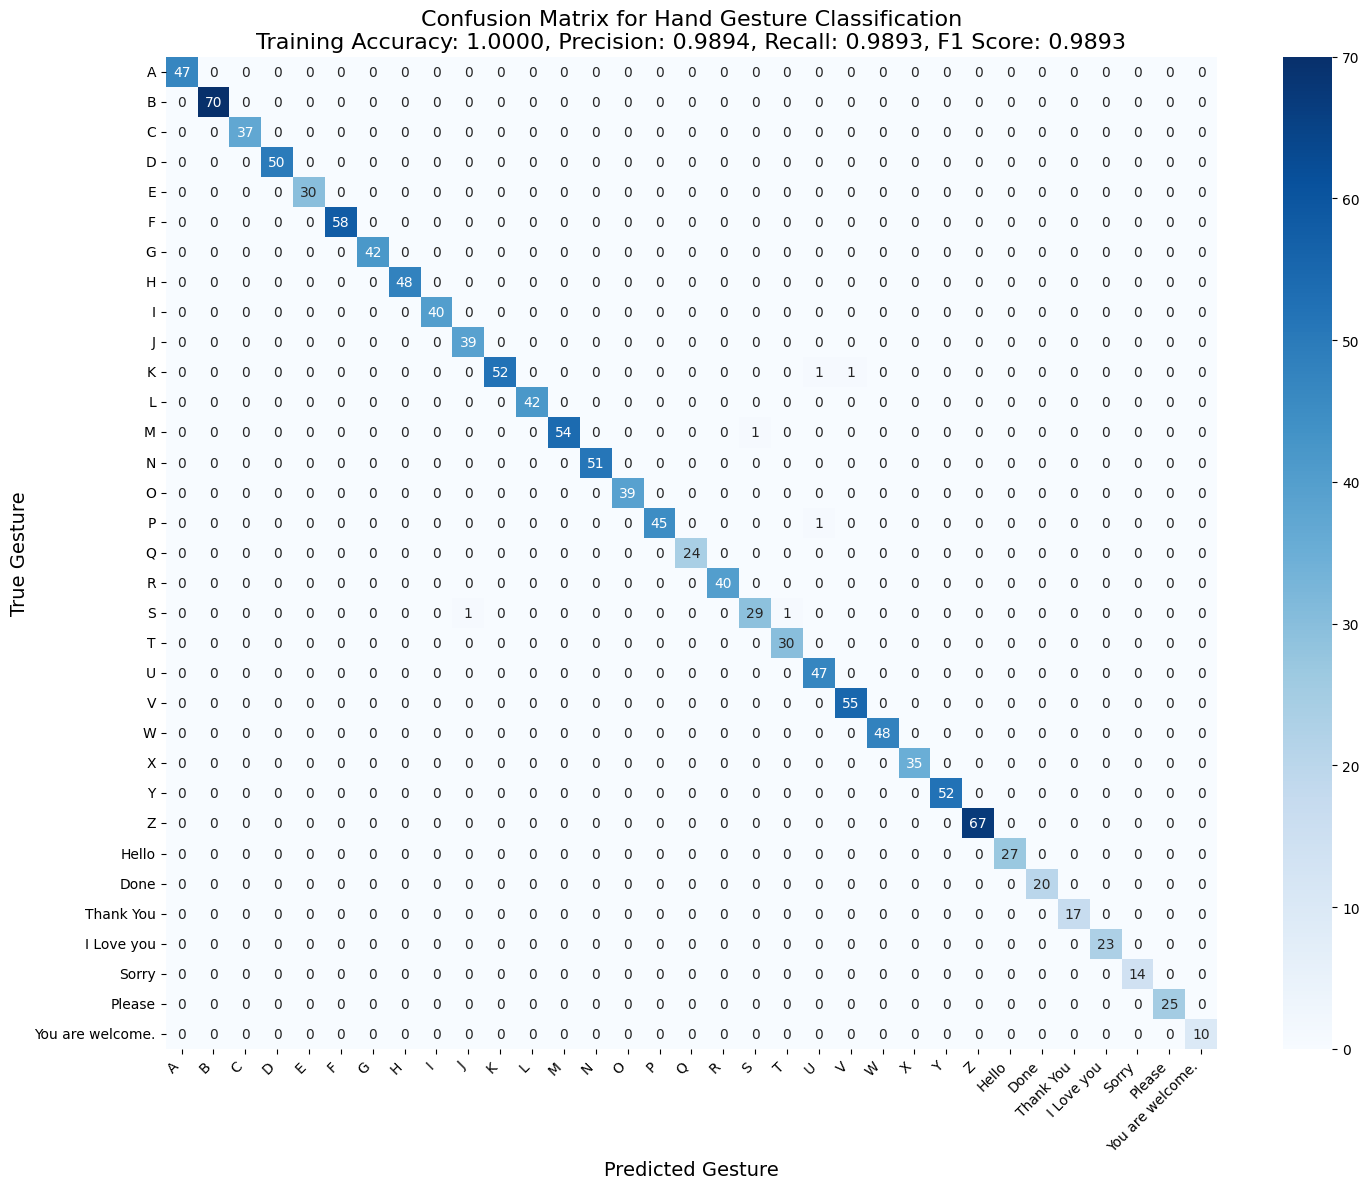

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle

# Load the CSV
df = pd.read_csv('data1.csv')

# ✅ Check the total number of columns
num_columns = df.shape[1]
print(f"📊 Number of columns in the file: {num_columns}")

# ✅ Ensure the number of columns (excluding label) is even for x/y pairs
if (num_columns - 1) % 2 != 0:
    raise ValueError("❌ Number of columns before label is not even, cannot create x/y correctly.")

# ✅ Rename columns: x0, y0, x1, y1, ...
num_points = (num_columns - 1) // 2
numeric_cols = [f'x{i//2}' if i % 2 == 0 else f'y{i//2}' for i in range(num_points * 2)]
new_columns = numeric_cols + ['label']
df.columns = new_columns

print("✅ Renamed columns:")
print(df.columns.tolist())

# ✅ Dictionary for label mapping
labels_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'Hello',
    27: 'Done', 28: 'Thank You', 29: 'I Love you', 30: 'Sorry', 31: 'Please',
    32: 'You are welcome.'
}

# ✅ Reverse dictionary for mapping strings to integers
reverse_labels_dict = {v.strip().lower(): k for k, v in labels_dict.items()}

# ✅ Inspect and convert labels to numeric
print(f"📊 Label column dtype: {df['label'].dtype}")
print(f"📊 First 5 labels: {df['label'].head().tolist()}")

if df['label'].dtype == object or df['label'].dtype == str:
    print("⚠️ Detected string labels in 'label' column. Converting to numeric.")
    df['label'] = df['label'].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)
    df['label'] = df['label'].map(reverse_labels_dict)
    if df['label'].isnull().any():
        unmapped = df[df['label'].isnull()]['label'].unique()
        raise ValueError(f"❌ Unmapped labels in 'data1.csv': {unmapped}")

# Ensure labels are integers
df['label'] = df['label'].astype(int)

# ✅ Check for undefined labels
unique_labels = df['label'].unique()
print(f"📊 Unique labels in dataset: {sorted(unique_labels)}")
unknown = set(unique_labels) - set(labels_dict.keys())
if unknown:
    print(f"⚠️ Undefined labels in dictionary: {unknown}")
else:
    print("✅ All labels are defined in the dictionary.")

# Prepare features (X) and target (y)
X = df.drop('label', axis=1)  # All columns except 'label'
y = df['label']  # The 'label' column

# Select the first 42 features to match the model's expectations
X = X.iloc[:, :42]  # Assuming the model was trained on x0, y0, ..., x20, y20
print(f"📊 Selected {X.shape[1]} features to match model expectations")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print test set distribution
test_counts = pd.Series(y_test).value_counts().sort_index()
print(f"📊 Test set counts per label: {dict(test_counts)}")
print(f"📊 Total test set size: {len(y_test)}")

# Load the pre-trained model and metrics
with open('model7.p', 'rb') as f:
    saved_data = pickle.load(f)

clf = saved_data['model']
train_score = saved_data['train_score']
precision = saved_data['precision']
recall = saved_data['recall']
f1 = saved_data['f1']

# Handle array metrics if necessary
train_score = np.mean(train_score) if isinstance(train_score, (list, np.ndarray)) else train_score
precision = np.mean(precision) if isinstance(precision, (list, np.ndarray)) else precision
recall = np.mean(recall) if isinstance(recall, (list, np.ndarray)) else recall
f1 = np.mean(f1) if isinstance(f1, (list, np.ndarray)) else f1

print(f"📈 Training Accuracy: {train_score:.4f}")
print(f"📈 Precision: {precision:.4f}")
print(f"📈 Recall: {recall:.4f}")
print(f"📈 F1 Score: {f1:.4f}")

# Make predictions on test set
y_pred = clf.predict(X_test)

# Inspect predictions
print(f"📊 y_pred dtype: {y_pred.dtype}")
print(f"📊 First 5 predictions: {y_pred[:5].tolist()}")

# Convert y_pred to numeric if it contains strings
if y_pred.dtype == object or y_pred.dtype == str:
    print("⚠️ Detected string predictions from model. Converting to numeric.")
    y_pred = np.array([x.strip().lower() if isinstance(x, str) else x for x in y_pred])
    y_pred = np.array([reverse_labels_dict[p] if p in reverse_labels_dict else np.nan for p in y_pred])
    if np.any(np.isnan(y_pred)):
        unmapped = set(y_pred[np.isnan(y_pred)])
        raise ValueError(f"❌ Unmapped predictions: {unmapped}")
    y_pred = y_pred.astype(int)

# Ensure y_pred is integer type
y_pred = y_pred.astype(int)

# Compute the confusion matrix with all possible labels (0 to 32)
cm = confusion_matrix(y_test, y_pred, labels=list(range(33)))

# Get all gesture names from labels_dict
label_names = [labels_dict[i] for i in range(33)]

# Plot the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title(f'Confusion Matrix for Hand Gesture Classification\n'
          f'Training Accuracy: {train_score:.4f}, Precision: {precision:.4f}, '
          f'Recall: {recall:.4f}, F1 Score: {f1:.4f}', fontsize=16)
plt.xlabel('Predicted Gesture', fontsize=14)
plt.ylabel('True Gesture', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()